In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
k = 2
cent_change = 0.0001
max_iter = 300 

In [3]:
colors = 3 * ["g",'r','c','b','k','y']

In [45]:
def fit(data, k, max_iter, tol):
    
    centroids = {}

    for i in range(k):
        centroids[i] = data[i]

    for i in range(max_iter): 
        classifications = {}
        
        for i in range(k):
            classifications[i] = []
            
        for featureset in data:
            distances = [np.linalg.norm(featureset - centroids[centroid]) for centroid in centroids]
#             for centroid in centroids:
#                 distances.append(np.linalg.norm(featureset - centroids[centroid]))
            classification = distances.index(min(distances))
            classifications[classification].append(featureset)
            
        prev_centroids = dict(centroids)
        
        for classification in classifications:
            centroids[classification] = np.average(classifications[classification],axis = 0)
        
        optimized = True
        
        for c in centroids:
            original_centroid = prev_centroids[c]
            current_centroid = centroids[c]
            
            if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > tol:
                optimzed = False
        
        if optimized == True:
            break
    
    return centroids, classifications
            

In [56]:
def predict(data, centroids):
    distances = [np.linalg.norm(data - centroids[centroid]) for centroid in centroids]
    classification = distances.index(min(distances))
    return classification

In [57]:
X = np.array([[1.7,1.8],
             [1.5,2],
             [2,2.3],
             [6,6.7],
             [6,8],
             [6.5,9]])

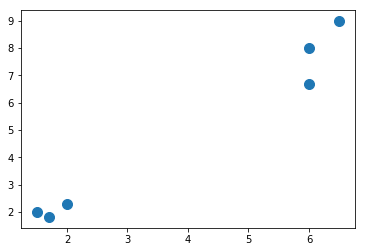

In [58]:
plt.scatter(X[:,0],X[:,1],s=100)

In [59]:
centroids , classifications = fit(X,k,max_iter,cent_change)

In [60]:
centroids

{0: array([1.85, 2.05]), 1: array([5.   , 6.425])}

In [61]:
classifications

{0: [array([1.7, 1.8]), array([2. , 2.3])],
 1: [array([1.5, 2. ]), array([6. , 6.7]), array([6., 8.]), array([6.5, 9. ])]}

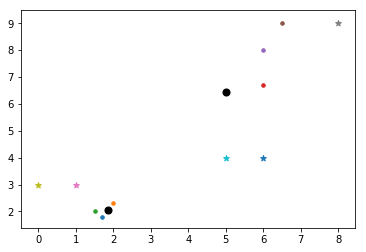

In [62]:
for class_1 in centroids:
    plt.scatter(centroids[class_1][0], centroids[class_1][1], marker = "o", color = "k",s = 50)
    
for class_2 in classifications:
    
    for featureset in classifications[class_2]:
        plt.scatter(featureset[0], featureset[1],marker = ".", s = 50)
        
X_test = np.array([[1,3],[8,9],[0,3],[5,4],[6,4]])

for test in X_test:
    classification = predict(test , centroids)
    plt.scatter(test[0],test[1],marker="*")

In [63]:
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split

In [64]:
wine = load_wine()
X = pd.DataFrame(wine.data , columns = wine.feature_names)
X = (X - X.min()/(X.max() - X.min()))

In [65]:
xtrain , xtest = train_test_split(X, test_size = 0.3)

In [66]:
f1 = "hue"
f2 = "proline"

basex = np.array(xtrain[[f1,f2]])

xtest = np.array(xtest[[f1,f2]])

In [67]:
centroids, classifications = fit(basex,k,max_iter,cent_change)